In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
location="linear-regression.csv"
df = pd.read_csv('linear-regression.csv')
df.insert(0, 'bias', '1')

In [3]:
df.head()

,bias,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data=np.array(df,dtype=np.float64)

In [5]:
X=data[:,:12]
Y=data[:,-1]
print(X.shape)
print(Y.shape)

(1599, 12)
(1599,)


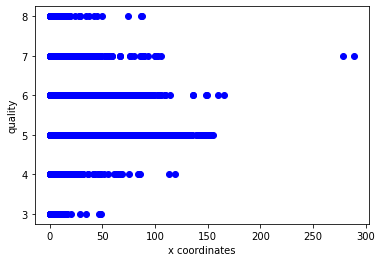

In [6]:
plt.xlabel('x coordinates')
plt.ylabel('quality')
plt.plot(X[:,1:10], Y, 'bo')
plt.show()


In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.5, random_state=1)

In [8]:
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=1)

In [9]:
print(len(X_train))
print(len(X_validation))
print(len(X_test))

799
480
320


In [10]:
def h(x,theta):
    return np.round(np.matmul(x, theta))
    '''return ans'''

In [11]:
def cost_function(x, y, theta):
    J=((h(x,theta-y)).T*(h(x,theta-y)))/(2*len(y))
    return J
        

In [12]:
def accuracy(x,y,theta):
    l=len(x)
    correct=0
    for i in range(0,l):
        y_predicted=round(h(x[i],theta))
        if(y_predicted==y[i]):
            correct+=1
    percentage=correct/l
    return percentage
    

In [13]:
def R_Square(x,y,theta):
    y_mean=round(np.mean(y))
    l=len(y)
    numerator=0
    denominator=0
    for i in range(l):
        numerator=numerator+(y[i]-(h(x[i],theta)))**2
        denominator=denominator+(y[i]-y_mean)**2
    value = numerator/denominator
    return 1-value

In [14]:
def RMSE(x,y,theta):
    l=len(y)
    total=0
    for i in range(l):
        y_predicted=round(h(x[i],theta))
        total=total+(y[i]-y_predicted)**2
    total=total/l
    total=math.sqrt(total)
    return total

<h2>Analytical Solution<h2>

In [15]:
theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print(theta)

[ 2.33689602e+01  3.05502970e-02 -1.19741412e+00 -1.87228641e-01
  1.17612142e-02 -1.81714527e+00  6.11854741e-03 -4.06437389e-03
 -1.90187880e+01 -4.42172779e-01  8.79804133e-01  2.64603431e-01]


In [16]:
#validation set R_Square
print("R_Square score on validation set "+ str(R_Square(X_validation,y_validation,theta)))

#test set R_Square
R_Square(X_test,y_test,theta)
print("R_Square score on test set "+ str(R_Square(X_test,y_test,theta)))

R_Square score on validation set 0.3252688172043011
R_Square score on test set 0.4125


In [17]:
#validation set RMSE

print("RMSE score on validation set "+ str(RMSE(X_validation,y_validation,theta)))
#test set RRMSE

print("RMSE score on test set "+ str(RMSE(X_test,y_test,theta)))

RMSE score on validation set 0.7231297716638879
RMSE score on test set 0.6637959023675877


<h4> With Regularization <h4>

In [18]:
Identity_matrix = np.identity(len(X_train.T.dot(X_train)), dtype = float)
lamda=2

In [19]:
theta_regularised = np.linalg.inv((X_train.T.dot(X_train))+(lamda*Identity_matrix)).dot(X_train.T).dot(y_train)

In [20]:
#validation set R_square
print("R_square score on validation set "+str(R_Square(X_validation,y_validation,theta_regularised)))

#test set R_square
print("R_square score on test set "+str(R_Square(X_test,y_test,theta_regularised)))

R_square score on validation set 0.31720430107526887
R_square score on test set 0.4041666666666667


In [21]:
#validation set RMSE
print("RMSE score in validation set "+str(RMSE(X_validation,y_validation,theta_regularised)))

#test set RMSE
print("RMSE score in test set "+str(RMSE(X_test,y_test,theta_regularised)))

RMSE score in validation set 0.7274384280931732
RMSE score in test set 0.6684870978560469


<h1> Interative Gradient Ascent <h1>

In [22]:
data=np.array(df,dtype=np.float64)
scaler=StandardScaler()
#data=scaler.fit_transform(data)
X=data[:,:12]
X=scaler.fit_transform(X)
Y=data[:,-1]
X[:,0]+=1
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.5, random_state=1)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=3)
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)


In [23]:
def predict_y(x,theta):
    t=np.dot(x,theta)
    #t=np.round(t)
    return t

In [24]:
def total_cost(y,x,theta):
    l=len(y)
    total=0
    for i in range(l):
        y_p=predict_y(x[i],theta)
        total+=((y[i])-y_p)**2
    return total/(2*l)
        

In [25]:
def gradient_ascent(x,y,theta,learning_rate,epoch):
    l=len(x)
    cost=[]
    cost_v=[]
    y_ep=[]
    for k in range(epoch):
        for i in range(0,l):
            y_p=(np.dot(x[i],theta))
            theta=theta+learning_rate*((y[i]-y_p)*x[i])
        cost.append(total_cost(y,x,theta))
        cost_v.append(total_cost(y_validation,X_validation,theta))
        y_ep.append(k+1)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(y_ep, cost, 'm', linewidth = "5")
    plt.plot(y_ep, cost_v, 'g', linewidth = "5")
    plt.show()
    
            
    return theta

<h1> learning rate  0.01 <h1>

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


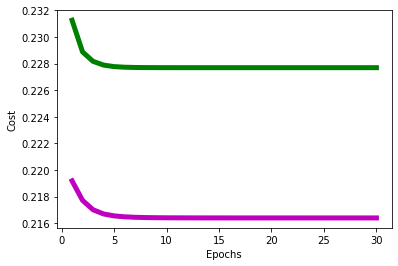

[ 5.68307762e+00  7.42779733e-02 -2.29303151e-01 -1.23909719e-02
 -5.13905267e-03 -7.03088937e-02  2.87840464e-02 -1.53703192e-01
 -7.70514640e-02 -8.76434628e-02  1.92294085e-01  2.55550579e-01]


In [26]:
theta=np.ones(X_train.shape[1])
print(theta)
theta=gradient_ascent(X_train,y_train,theta,0.01,30)
#theta=gradient_ascent(X_validation,y_validation,theta,0.001,8)
print(theta)

In [27]:
#validation set R_square
print("R_square score on validation set "+str(R_Square(X_validation,y_validation,theta)))

#test set R_square
print("R_square score on test set "+str(R_Square(X_test,y_test,theta)))

#validation set RMSE
print("RMSE score in validation set "+str(RMSE(X_validation,y_validation,theta)))

#test set RMSE
print("RMSE score in test set "+str(RMSE(X_test,y_test,theta)))

R_square score on validation set 0.3207547169811321
R_square score on test set 0.34024896265560167
RMSE score in validation set 0.724568837309472
RMSE score in test set 0.7048936089935842


<h2> learning rate 0.001 <h2>

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


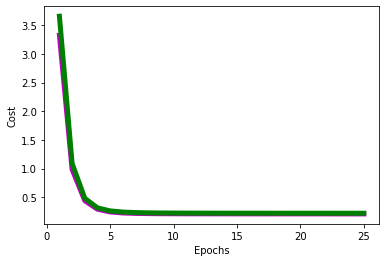

[ 5.63497931  0.14985331 -0.2212362  -0.04276823  0.03703155 -0.08287322
  0.05252941 -0.12511438 -0.11621356 -0.02853727  0.16184291  0.2306727 ]


In [28]:
theta=np.ones(X_train.shape[1])
print(theta)
theta=gradient_ascent(X_train,y_train,theta,0.001,25)
#theta=gradient_ascent(X_validation,y_validation,theta,0.001,8)
print(theta)

In [29]:
#validation set R_square
print("R_square score on validation set "+str(R_Square(X_validation,y_validation,theta)))

#test set R_square
print("R_square score on test set "+str(R_Square(X_test,y_test,theta)))

#validation set RMSE
print("RMSE score in validation set "+str(RMSE(X_validation,y_validation,theta)))

#test set RMSE
print("RMSE score in test set "+str(RMSE(X_test,y_test,theta)))

R_square score on validation set 0.34231805929919135
R_square score on test set 0.39004149377593356
RMSE score in validation set 0.7129749878735813
RMSE score in test set 0.677772085586298


<h2> learning rate  0.0001 <h2>

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


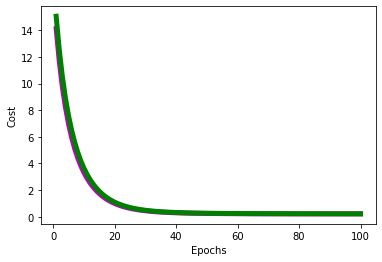

[ 5.62801849  0.23779981 -0.19387312 -0.01231657  0.04698724 -0.06148979
  0.04975034 -0.10414104 -0.1857068   0.06427407  0.15715722  0.20016874]


In [30]:
theta=np.ones(X_train.shape[1])
print(theta)
theta=gradient_ascent(X_train,y_train,theta,0.0001,100)
#theta=gradient_ascent(X_validation,y_validation,theta,0.001,8)
print(theta)

In [31]:
#validation set R_square
print("R_square score on validation set "+str(R_Square(X_validation,y_validation,theta)))

#test set R_square
print("R_square score on test set "+str(R_Square(X_test,y_test,theta)))

#validation set RMSE
print("RMSE score in validation set "+str(RMSE(X_validation,y_validation,theta)))

#test set RMSE
print("RMSE score in test set "+str(RMSE(X_test,y_test,theta)))

R_square score on validation set 0.31805929919137466
R_square score on test set 0.3817427385892116
RMSE score in validation set 0.7260050504874834
RMSE score in test set 0.6823672031978091
